Client Name: Sarah Li

Client Request: A real time wealth tracking dashboard

Requirements: 1. Real Time, 2. Include (Portfolio Value Over Time, Asset Allocation Chart, Riskiness Assessment)

Key Assumptions: Timeframe: 2009.08.01 (15 years); Initial Investment: $20,000,000 HKD; Portfolio Composition: 50% Equity (10% AAPL, 10% WMT, 10% NVDA, 5% 0700.HK, 5% LLY, 5% KO, 5% NKE), 30% Bonds (15% TLT, 15% BND), 10% REITs (10% VNQ), and 10% PE Funds (5% PSP, 5% BX). 

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import seaborn as sns

In [6]:
client_name = 'Sarah Li'
initial_investment = 20000000
begin_date = '2009-08-01'
portfolio = {
    'equity_tickers' : ['AAPL','WMT','NVDA','0700.HK','LLY','KO','NKE'],
    'bond_tickers' : ['TLT','BND'],
    'reits' : ['VNQ'],
    'pe_tickers' : ['PSP','BX'] 
}

portfolio_weights = {
    'equity_weights': [0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05],
    'bond_weights': [0.15, 0.15],
    'reits_weights': [0.1],
    'pe_weights': [0.05, 0.05]
}

In [7]:
prices_data = pd.DataFrame()
for asset, tickers in portfolio.items():
    ticker_data = yf.download(tickers, start = begin_date) ['Adj Close']

    if len(tickers) == 1:
        ticker_data.name = tickers[0]
        ticker_data = ticker_data.to_frame() 
    
    prices_data = pd.concat([prices_data, ticker_data], axis=1)

SP500_Prices = pd.Series(yf.download('^GSPC', start = begin_date)['Adj Close'])
SP500_Returns = SP500_Prices.pct_change().dropna()
SP500_Value = (1 + SP500_Returns).cumprod() * initial_investment

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
prices_change = np.log(prices_data / prices_data.shift(1)).dropna()
prices_change

,0700.HK,AAPL,KO,LLY,NKE,NVDA,WMT,BND,TLT,VNQ,BX,PSP
Date,,,,,,,,,,,,
2009-08-04,0.003633,-0.005302,-0.002018,0.002856,0.016118,0.006754,0.000201,-0.000899,-0.007984,0.053179,-0.053456,-0.001180
2009-08-05,-0.017376,-0.002661,-0.006689,-0.010321,-0.009078,0.002241,-0.013125,-0.002315,-0.015060,0.037519,0.145830,0.010570
2009-08-06,0.008268,-0.007294,0.004465,-0.008102,0.010468,-0.021116,-0.004482,0.000645,0.003403,-0.007603,-0.066323,-0.015303
2009-08-07,-0.024075,0.009714,-0.001013,0.013563,0.007779,0.043987,0.006310,-0.006972,-0.008364,0.054289,0.020503,0.039540
2009-08-10,0.041310,-0.004785,0.002025,-0.030852,-0.016145,-0.033374,0.008686,0.008129,0.012410,-0.021669,0.041801,0.003414
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,-0.012759,0.002032,0.001751,0.025690,0.000255,0.016566,0.007749,0.001883,0.006251,0.002628,0.020853,0.009485
2024-08-15,-0.014552,0.013440,0.001020,0.001289,0.049445,0.039683,0.063755,-0.004175,-0.008103,-0.000766,0.000808,0.013193
2024-08-16,0.011336,0.005901,0.007691,-0.010207,0.008810,0.013903,0.006529,0.002157,0.003495,-0.000547,-0.014711,0.004726


In [9]:
weights = []
for w in portfolio_weights:
    weights.extend(portfolio_weights[w])
weights

[0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.1, 0.05, 0.05]

In [10]:
portfolio_returns = (prices_change * weights).sum(axis =1)
portfolio_returns

Date
2009-08-04    0.002182
2009-08-05    0.004779
2009-08-06   -0.004852
2009-08-07    0.008175
2009-08-10    0.003445
                ...   
2024-08-14    0.004615
2024-08-15    0.006481
2024-08-16    0.003738
2024-08-19    0.004243
2024-08-20    0.000509
Length: 3389, dtype: float64

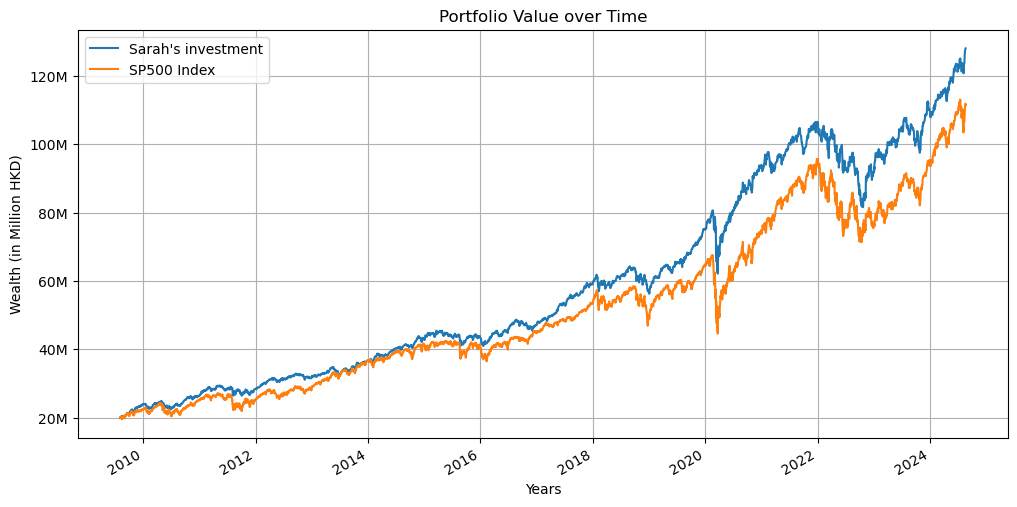

In [11]:
portfolio_value = (1 + portfolio_returns).cumprod() * initial_investment

sarah_wealth = portfolio_value.plot(label= "Sarah's investment", figsize = (12,6))
SP500 = SP500_Value.plot(label= 'SP500 Index', figsize = (12,6))
sarah_wealth.set_ylabel('Wealth (in Million HKD)')
sarah_wealth.set_xlabel('Years')
sarah_wealth.set_title('Portfolio Value over Time')

sarah_wealth.yaxis.set_major_formatter(tk.FuncFormatter(lambda x, _: f'{x * 1e-6:.0f}M'))
plt.legend()
plt.grid(True)
plt.show()

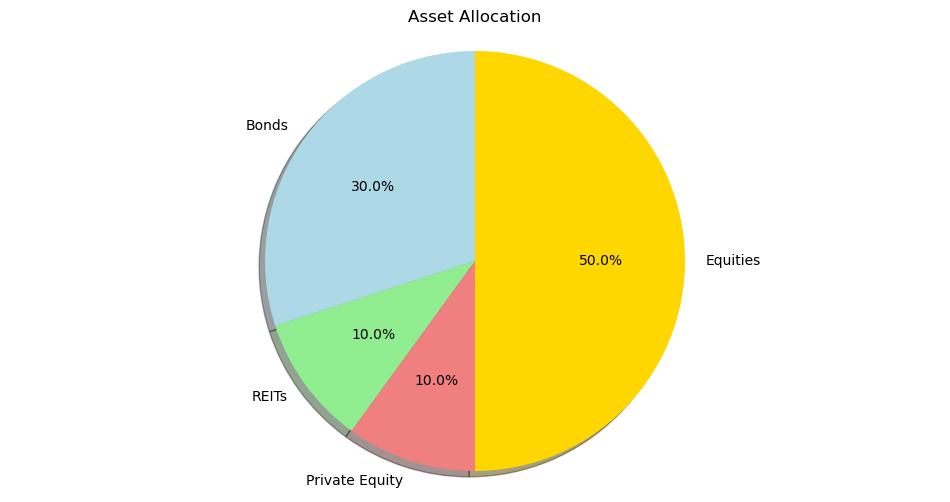

In [12]:
allocation = {
    'Equities': sum(portfolio_weights['equity_weights']),
    'Bonds': sum(portfolio_weights['bond_weights']),
    'REITs': sum(portfolio_weights['reits_weights']),
    'Private Equity': sum(portfolio_weights['pe_weights'])
}

labels = allocation.keys()
sizes = allocation.values()
colors = ['gold', 'lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Asset Allocation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

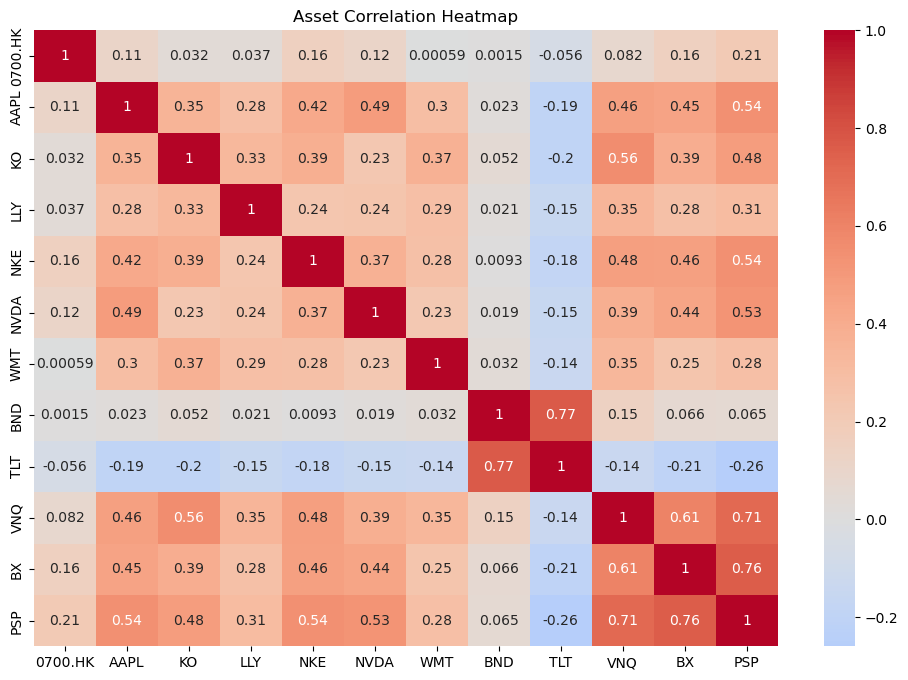

In [13]:
risks = prices_change.std()
correlation = prices_change.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Asset Correlation Heatmap')
plt.show()

In [29]:
treasury_data = yf.download("^TNX", period="1mo", interval="1d") 
risk_free_rate = treasury_data['Close'].iloc[-1] / 100 

[*********************100%%**********************]  1 of 1 completed


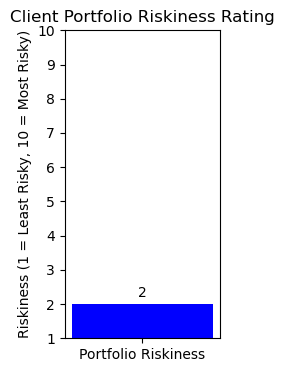

The riskiness of the client's portfolio is rated 2 out of 10.


In [15]:
mean_returns = prices_change.mean()
portfolio_return = mean_returns.mean()
portfolio_volatility = risks.mean()
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

def risk_level(risks, correlation, sharpe):
    if risks > 0.2 and correlation.mean().mean() > 0.5 and sharpe < 1:
        return 8
    elif risks > 0.15 and correlation.mean().mean() > 0.3 and sharpe < 1.5:
        return 6
    elif risks > 0.1 and correlation.mean().mean() > 0.2 and sharpe < 2:
        return 4
    else:
        return 2

risk_score = risk_level(portfolio_volatility, correlation, sharpe_ratio)

fig, ax = plt.subplots(figsize=(2, 4))

ax.bar(['Portfolio Riskiness'], [risk_score], color='blue')

ax.set_ylim(1, 10)

ax.set_ylabel('Riskiness (1 = Least Risky, 10 = Most Risky)')
ax.set_title('Client Portfolio Riskiness Rating')

for index, value in enumerate([risk_score]):
    ax.text(index, value + 0.2, f'{value}', ha='center')

plt.show()
print(f"The riskiness of the client's portfolio is rated {risk_score} out of 10.")